# Binary Classification Using TensorFlow

In [1]:
import sys
!{sys.executable} -m pip install numpy;
!{sys.executable} -m pip install pandas;
!{sys.executable} -m pip install seaborn;
!{sys.executable} -m pip install tensorflow-macos;
!{sys.executable} -m pip install matplotlib;
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install graphviz

### Importing Libraries

In [2]:
# Importing libraries needed for this project
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow import math
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils.vis_utils import plot_model

### Getting the Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/niranjana1997/Binary-Classification---Wine-Quality/cfd2bb70804d8683102f6d0140cfdcf033b02340/WineQuality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data Pre-processing

Type: Convert 'white' and 'red' to numeric
Other columns: values needs to be normalized (represnt these values between zero to 1)

##### 1. Delete rows with unknowns

Removing rows with null values

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### 2. Rename column and change red_wine column based on condition

Converting all the white wines to 0 and red wines to 1

In [6]:
# Changing the 'type' column to 'red_wine'
df.rename(columns={"type":"red_wine"}, inplace = True)
df.head()

,red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# changing values in the 'red_wine' column. If the value is 'red', 
# it is converted to 1, else 0
df.loc[df["red_wine"] == "red" , "red_wine"] = 1
df.loc[df["red_wine"] == "white" , "red_wine"] = 0
df.head()

,red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### 3. Changing 'quality' column based on the condition
Values over 7 is considered as good wine (1)

Values unfer 7 is considered as bad wine (0)

In [8]:
df.loc[df["quality"] <= 6, "quality"] = 0
df.loc[df["quality"] > 6, "quality"] = 1
df.head()

,red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


##### 4. Calculating the number of good and bad wines

In [9]:
# Calculating the number of good wines
print("Number of good wines:",(df['quality'] == 1).sum())
print("Number of bad wines:",(df['quality'] == 0).sum())

Number of good wines: 1271
Number of bad wines: 5192


##### 5. Normalizing the data
Different values are put on the same scale (between 0 and 1)

In [10]:
transform_function = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]), # Normalize these columns
)

##### 5. Separate Features & Labels
Separating the dataframe into input features and output labels

In [11]:
# input features
X = df.drop("quality", axis = 1) 
# output labels
y = df["quality"] 

###### 6. Splitting the dataset from training and testing

In [12]:
# Building the testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### 7. Transforming the new datasets
Running the make_column_transformer function to normalize the new datasets

In [13]:
transform_function.fit(X_train)
X_train_normalized = transform_function.transform(X_train)
X_test_normalized = transform_function.transform(X_test)

### Building a model

1. Learning rate - 0.001
2. Activation function - ReLU
3. Regularization - None
4. Regularization Rate - 0
5. Ratio (training:testing) - (0.8:0.2)

##### 1. Setting random seed

In [14]:
tf.random.set_seed(42)

##### 2. Creating the model

Activation functions is used to help the network decide what data is important. They receive data and add weightings to it and pass the results to other hidden layers. Depending on the error value the weights are updated

In [15]:
# hidden layer 1, ReLU activation
# hidden layer 2, ReLU activation
# ouput layer, sigmoid activation

# The features are passed and converted to a 4-valued vector. 
# This vector is then converted to additional optimized vector
# This is then converted into a prediction whether the wine is good or bad
binary_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) 
])

##### 3. Compile the model

The model is compiled in this step (Calculate the errors, optimize, evaluate)

Loss: Find the average loss of errors between prediction and observed data

adam: optimizes the guesses by smoothing the predictions to the observed data

Metrics: Tests the model accuracy

In [16]:
binary_model_1.compile(loss=tf.keras.losses.binary_crossentropy, 
                     optimizer=tf.keras.optimizers.Adam(), 
                     metrics=['accuracy'])

##### 4. Fit the model
Take the data and try to fit the data with the number of epochs tries creating a trained model. An epoch is a full iteration over the training data

In [17]:
history = binary_model_1.fit(X_train_normalized, y_train, epochs=300)

Epoch 1/300


2022-10-13 18:25:31.766260: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


162/162 [==============================] - 0s 472us/step - loss: 0.5888 - accuracy: 0.8081
Epoch 2/300
162/162 [==============================] - 0s 415us/step - loss: 0.4831 - accuracy: 0.8066
Epoch 3/300
162/162 [==============================] - 0s 412us/step - loss: 0.4659 - accuracy: 0.8066
Epoch 4/300
162/162 [==============================] - 0s 406us/step - loss: 0.4515 - accuracy: 0.8068
Epoch 5/300
162/162 [==============================] - 0s 431us/step - loss: 0.4419 - accuracy: 0.8075
Epoch 6/300
162/162 [==============================] - 0s 402us/step - loss: 0.4343 - accuracy: 0.8093
Epoch 7/300
162/162 [==============================] - 0s 405us/step - loss: 0.4300 - accuracy: 0.8095
Epoch 8/300
162/162 [==============================] - 0s 397us/step - loss: 0.4256 - accuracy: 0.8091
Epoch 9/300
162/162 [==============================] - 0s 405us/step - loss: 0.4229 - accuracy: 0.8095
Epoch 10/300
162/162 [==============================] - 0s 434us/step - loss: 0.4203 

Epoch 80/300
162/162 [==============================] - 0s 389us/step - loss: 0.3941 - accuracy: 0.8155
Epoch 81/300
162/162 [==============================] - 0s 382us/step - loss: 0.3936 - accuracy: 0.8190
Epoch 82/300
162/162 [==============================] - 0s 380us/step - loss: 0.3941 - accuracy: 0.8139
Epoch 83/300
162/162 [==============================] - 0s 393us/step - loss: 0.3942 - accuracy: 0.8161
Epoch 84/300
162/162 [==============================] - 0s 387us/step - loss: 0.3937 - accuracy: 0.8164
Epoch 85/300
162/162 [==============================] - 0s 383us/step - loss: 0.3940 - accuracy: 0.8166
Epoch 86/300
162/162 [==============================] - 0s 395us/step - loss: 0.3942 - accuracy: 0.8155
Epoch 87/300
162/162 [==============================] - 0s 394us/step - loss: 0.3934 - accuracy: 0.8172
Epoch 88/300
162/162 [==============================] - 0s 400us/step - loss: 0.3945 - accuracy: 0.8159
Epoch 89/300
162/162 [==============================] - 0s 413us

162/162 [==============================] - 0s 398us/step - loss: 0.3903 - accuracy: 0.8205
Epoch 159/300
162/162 [==============================] - 0s 396us/step - loss: 0.3903 - accuracy: 0.8211
Epoch 160/300
162/162 [==============================] - 0s 394us/step - loss: 0.3902 - accuracy: 0.8221
Epoch 161/300
162/162 [==============================] - 0s 395us/step - loss: 0.3903 - accuracy: 0.8203
Epoch 162/300
162/162 [==============================] - 0s 390us/step - loss: 0.3900 - accuracy: 0.8232
Epoch 163/300
162/162 [==============================] - 0s 414us/step - loss: 0.3899 - accuracy: 0.8221
Epoch 164/300
162/162 [==============================] - 0s 417us/step - loss: 0.3899 - accuracy: 0.8207
Epoch 165/300
162/162 [==============================] - 0s 407us/step - loss: 0.3897 - accuracy: 0.8219
Epoch 166/300
162/162 [==============================] - 0s 401us/step - loss: 0.3898 - accuracy: 0.8197
Epoch 167/300
162/162 [==============================] - 0s 434us/ste

162/162 [==============================] - 0s 390us/step - loss: 0.3877 - accuracy: 0.8246
Epoch 237/300
162/162 [==============================] - 0s 401us/step - loss: 0.3879 - accuracy: 0.8250
Epoch 238/300
162/162 [==============================] - 0s 401us/step - loss: 0.3879 - accuracy: 0.8248
Epoch 239/300
162/162 [==============================] - 0s 393us/step - loss: 0.3880 - accuracy: 0.8242
Epoch 240/300
162/162 [==============================] - 0s 402us/step - loss: 0.3879 - accuracy: 0.8255
Epoch 241/300
162/162 [==============================] - 0s 395us/step - loss: 0.3880 - accuracy: 0.8228
Epoch 242/300
162/162 [==============================] - 0s 398us/step - loss: 0.3872 - accuracy: 0.8226
Epoch 243/300
162/162 [==============================] - 0s 399us/step - loss: 0.3879 - accuracy: 0.8251
Epoch 244/300
162/162 [==============================] - 0s 386us/step - loss: 0.3877 - accuracy: 0.8267
Epoch 245/300
162/162 [==============================] - 0s 398us/ste

## Evaluate a model

In [18]:
binary_model_1.evaluate(X_train_normalized, y_train)

162/162 [==============================] - 0s 374us/step - loss: 0.3866 - accuracy: 0.8259


[0.38659802079200745, 0.8259187340736389]

The model can be improved by:
* Fit on more data
* Increase Hidden units: Add weightings to get desired output
* Try different activation function: Help identify and decide what data is most important
* Try different optimization function: Optimizing by smoothing data to expected results
* Increase learning rate: How much to change the model based on estimated error
* Fit longer: Increase the number of times we try to fit the data

##### Correlation Matrix
This is used to check which column contributes the most to whether the wine is of good quality or not.

According to the heatmap, most correlation can be found with alcohol, density, chlorides and volatile density

/var/folders/fn/yvlx351d13xb1k_rybw4y1m00000gn/T/ipykernel_26950/1847479085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(),annot=True)


<AxesSubplot: >

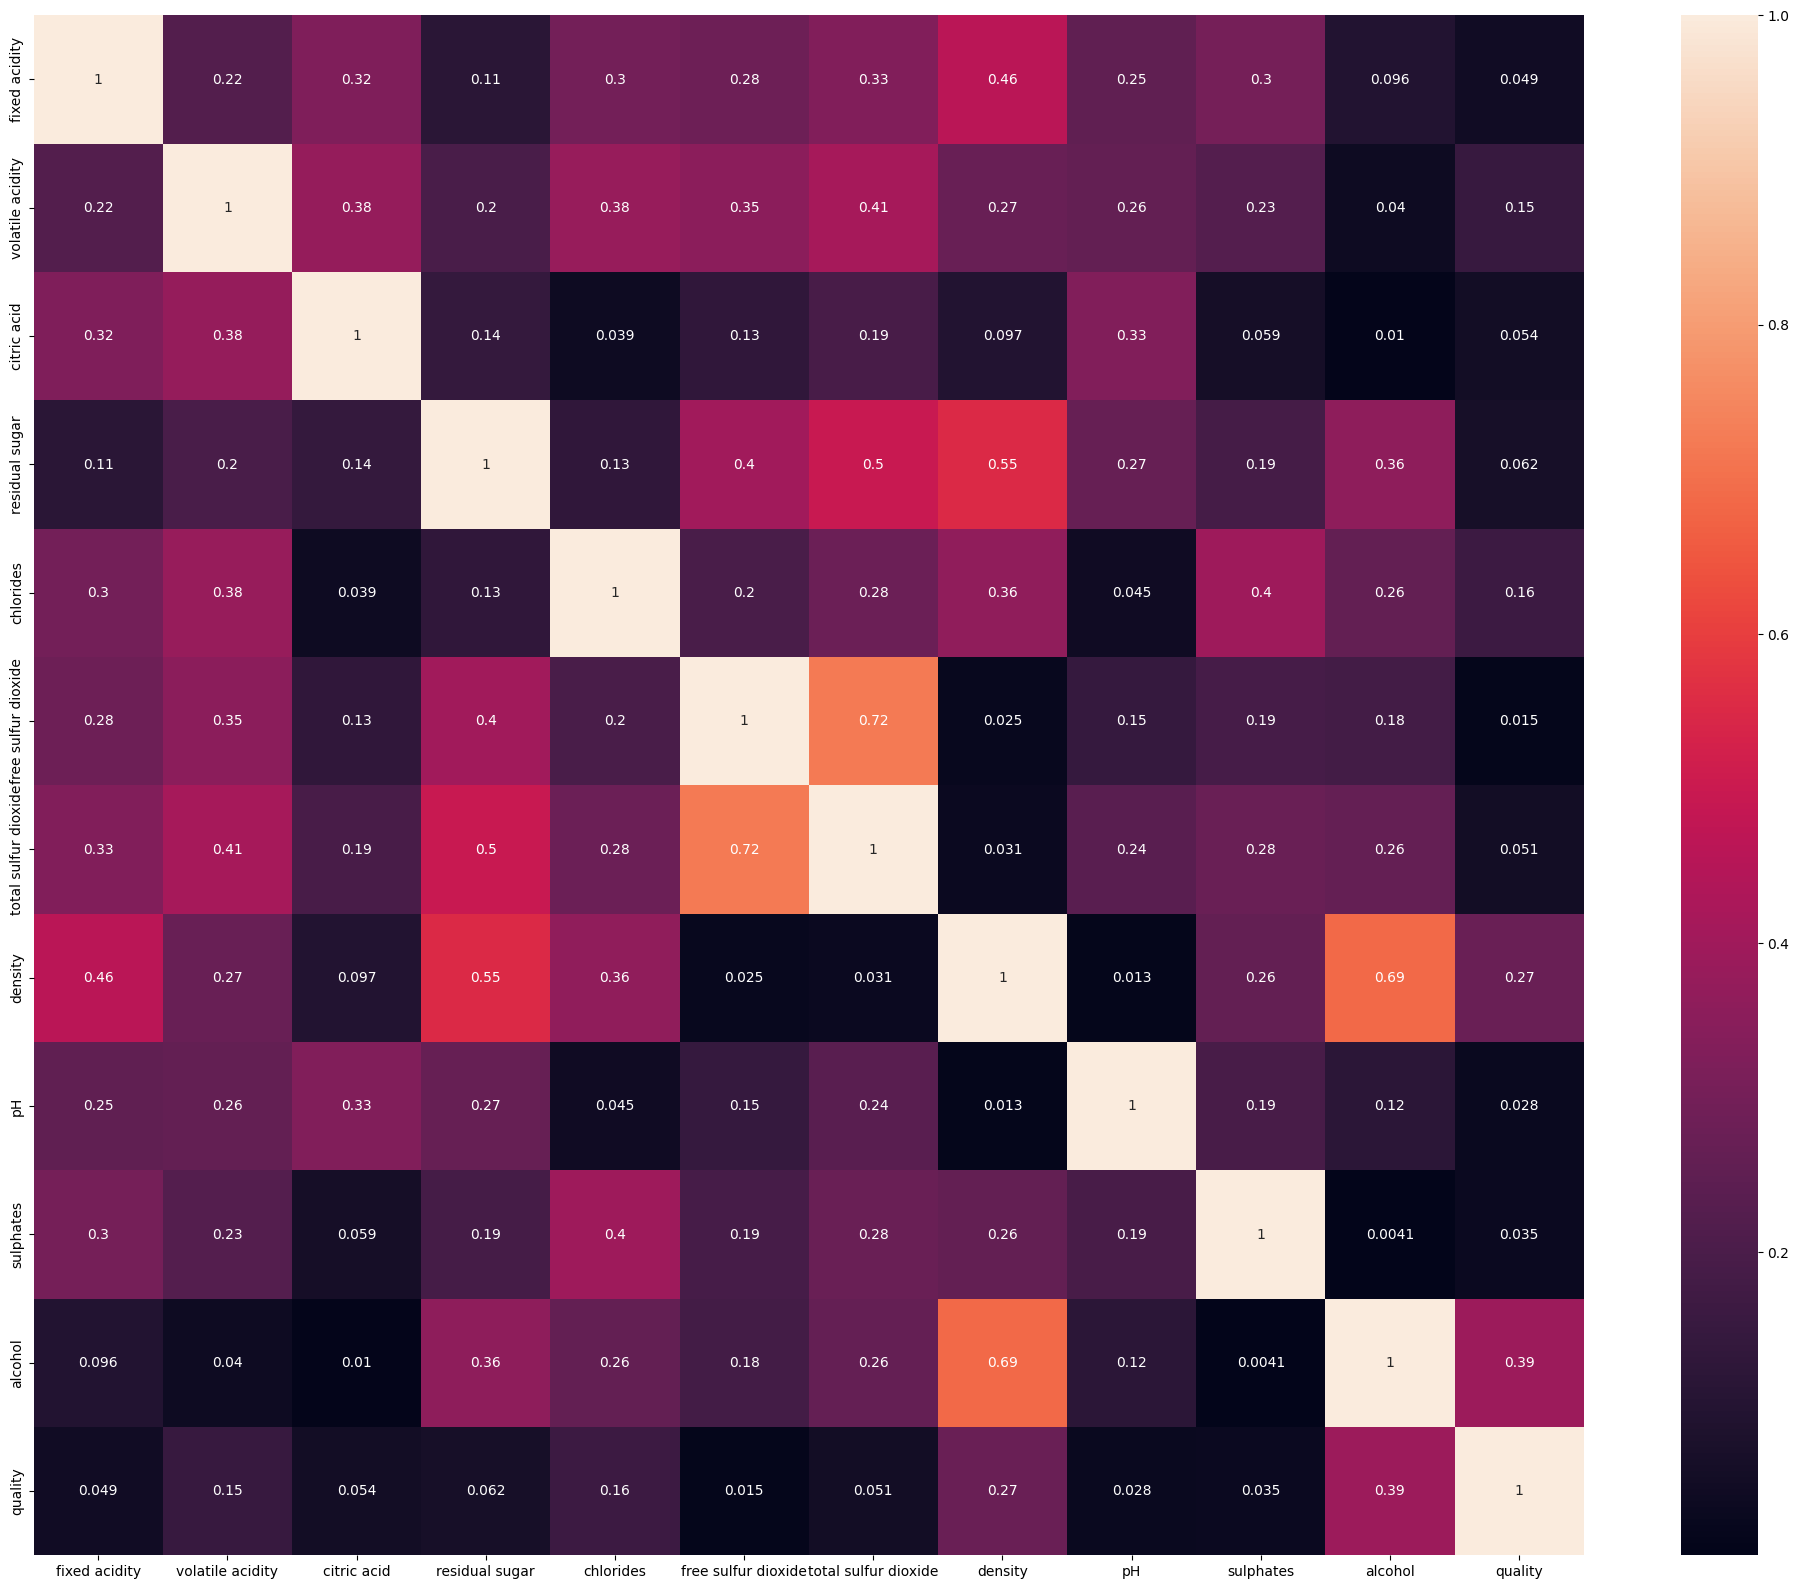

In [19]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr().abs(),annot=True)

##### Plotting loss curve

Text(0.5, 1.0, 'Binary Classification: Accuracy - Loss Curve')

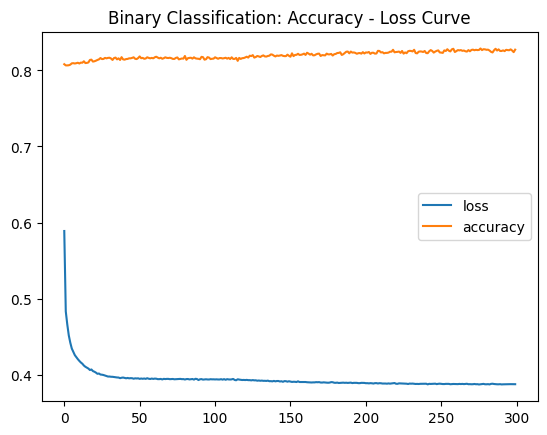

In [20]:
pd.DataFrame(history.history).plot()
plt.title("Binary Classification: Accuracy - Loss Curve")

##### Callback is used to find the ideal learning rate

In [21]:
tf.random.set_seed(42)

binary_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

binary_model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback is used during model training where at each epoch, 
# the learning rate is changed and the schedular gives Adam the updated 
# learning rate

# Learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_learning_rate = binary_model_2.fit(X_train_normalized, y_train, 
epochs=100,
callbacks=[scheduler])

Epoch 1/100
162/162 [==============================] - 0s 454us/step - loss: 0.6522 - accuracy: 0.8066 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 0s 405us/step - loss: 0.6313 - accuracy: 0.8066 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 0s 407us/step - loss: 0.6032 - accuracy: 0.8066 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 0s 421us/step - loss: 0.5718 - accuracy: 0.8066 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 0s 416us/step - loss: 0.5413 - accuracy: 0.8066 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 0s 430us/step - loss: 0.5149 - accuracy: 0.8066 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 0s 401us/step - loss: 0.4962 - accuracy: 0.8066 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 0s 397us/step - loss: 0.4853 - accuracy: 0.8066 - lr: 2.2387e-04
Epoch 9/100
162/162 [===================

162/162 [==============================] - 0s 401us/step - loss: 0.4238 - accuracy: 0.8029 - lr: 0.2818
Epoch 71/100
162/162 [==============================] - 0s 398us/step - loss: 0.4262 - accuracy: 0.8058 - lr: 0.3162
Epoch 72/100
162/162 [==============================] - 0s 397us/step - loss: 0.4249 - accuracy: 0.8068 - lr: 0.3548
Epoch 73/100
162/162 [==============================] - 0s 392us/step - loss: 0.4402 - accuracy: 0.8058 - lr: 0.3981
Epoch 74/100
162/162 [==============================] - 0s 391us/step - loss: 0.4342 - accuracy: 0.8021 - lr: 0.4467
Epoch 75/100
162/162 [==============================] - 0s 398us/step - loss: 0.4534 - accuracy: 0.8052 - lr: 0.5012
Epoch 76/100
162/162 [==============================] - 0s 394us/step - loss: 0.4481 - accuracy: 0.8050 - lr: 0.5623
Epoch 77/100
162/162 [==============================] - 0s 399us/step - loss: 0.5080 - accuracy: 0.8066 - lr: 0.6310
Epoch 78/100
162/162 [==============================] - 0s 400us/step - loss:

##### Plotting learning rate with the loss

Text(0.5, 1.0, 'Learning Rate vs. Loss')

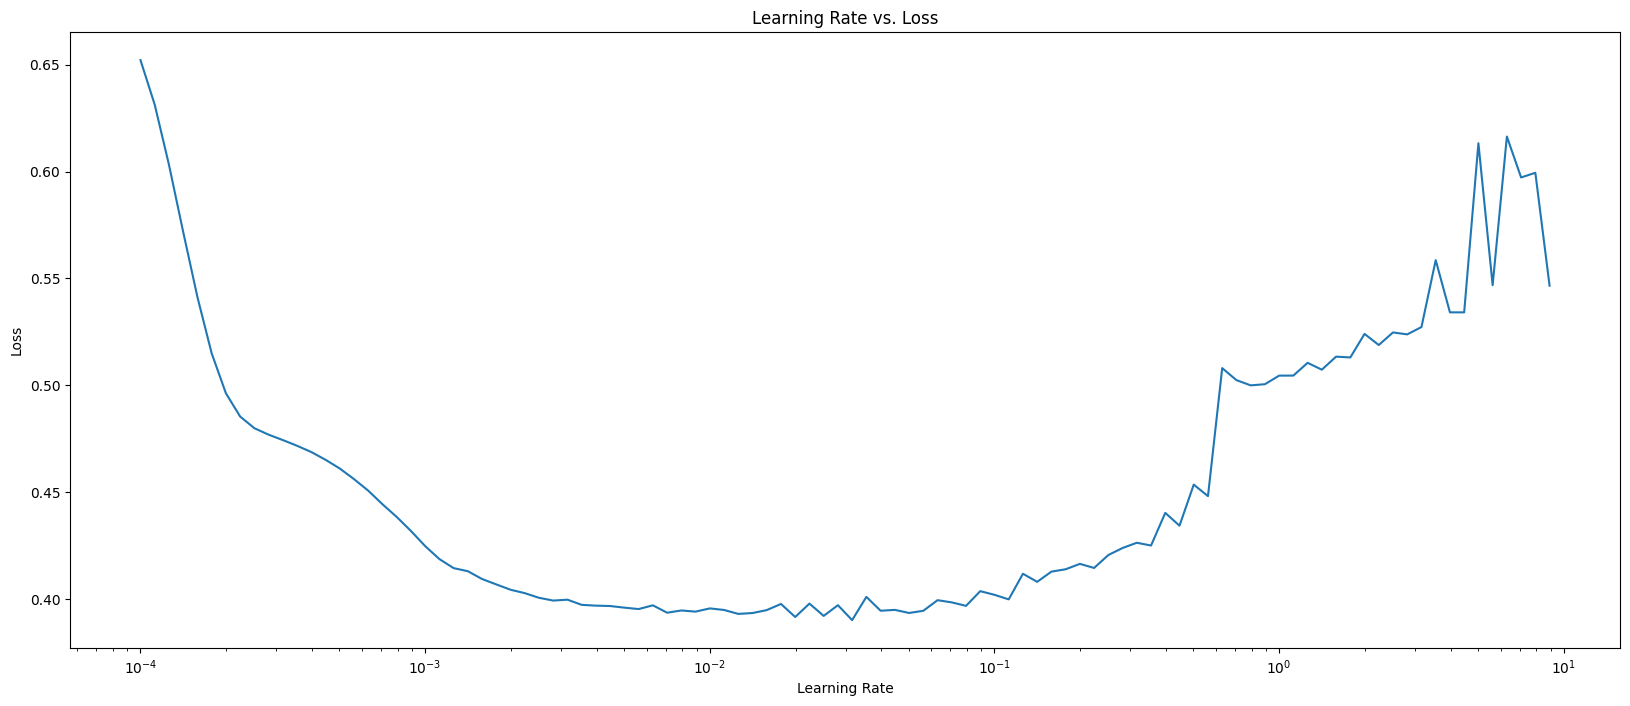

In [22]:
learning_rate = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 8))
plt.semilogx(learning_rate, history_learning_rate.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

According to the above figure, 0.001 is around the best learning rate

Best learning rate is found by taking the learning rate where loss is decreasing but hasn't flattened out.

##### Evaluating the test data

In [23]:
loss, accuracy = binary_model_1.evaluate(X_test_normalized, y_test)
print("Model Loss (Test data):", loss)
print("Model Accuracy (Test data):", accuracy)

41/41 [==============================] - 0s 419us/step - loss: 0.3888 - accuracy: 0.8206
Model Loss (Test data): 0.38880473375320435
Model Accuracy (Test data): 0.8205723166465759
